[-0.98664141  2.54915778 -0.03418362 -0.23686513 -0.07873553  0.0034531
  0.36369474]
Accuracy: 0.7988826815642458
Precision: 0.7796610169491526
Recall: 0.6666666666666666
F1 Score: 0.71875
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Actual  \
565       3    0  24.000000      2      0  24.1500         0       0   
160       3    0  44.000000      0      1  16.1000         0       0   
553       3    0  22.000000      0      0   7.2250         1       1   
860       3    0  41.000000      2      0  14.1083         0       0   
241       3    1  29.699118      1      0  15.5000         2       1   

     Predicted      prob  
565          0  0.074310  
160          0  0.055265  
553          0  0.157766  
860          0  0.041563  
241          1  0.682748  


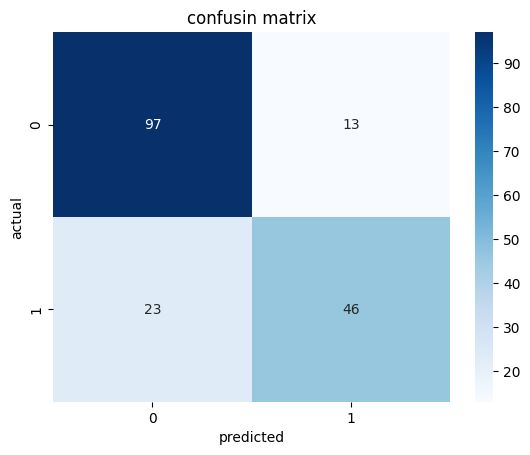

submission.csv created for (rows=418)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score,classification_report,f1_score,confusion_matrix
import seaborn as sns

train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
train_df_cp=train_df.copy()
for col in ['Name','Ticket','Cabin']:
    if col in train_df_cp.columns:
        train_df_cp=train_df_cp.drop(columns=[col])
for col in ['Age','Fare']:
    if col in train_df_cp.columns:
        train_df_cp[col]=train_df_cp[col].fillna(train_df_cp[col].mean())
if 'Sex' in train_df_cp.columns:
    train_df_cp['Sex']=train_df_cp['Sex'].map({'male':0,'female':1}).astype(int)
if 'Embarked' in train_df_cp.columns:
    train_df_cp['Embarked'] = train_df_cp['Embarked'].fillna('S')  
    train_df_cp['Embarked'] = train_df_cp['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
for c in ['class', 'who', 'adult_male', 'alive', 'embark_town', 'deck', 'alone']:
    if c in train_df_cp.columns:
        train_df_cp = train_df_cp.drop(columns=[c])
# print("After preprocessing shape:", train_df_cp.shape)
# print(train_df_cp.head())
# print("\nMissing now:\n", train_df_cp.isna().sum())
X = train_df_cp[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=train_df_cp['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(model.coef_[0])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

sample = X_test.copy()
sample['Actual'] = y_test
sample['Predicted'] = y_pred
sample['prob']=model.predict_proba(X_test)[:,1]
print(sample.head(5))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusin matrix')
plt.show()






# coefficients=pd.series(model.coef)
# print(y_pred)
train_df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
train_df_test_cp=train_df_test.copy()
for col in ['Name','Ticket','Cabin','class','who','adult_male','alive','embark_town','deck','alone']:
    if col in train_df_test_cp.columns:
        train_df_test_cp = train_df_test_cp.drop(columns=[col])
for col in ['Age','Fare']:
    if col in train_df_test_cp.columns:
        train_df_test_cp[col]=train_df_test_cp[col].fillna(train_df_test_cp[col].mean())
if 'Sex' in train_df_test_cp.columns:
    train_df_test_cp['Sex']=train_df_test_cp['Sex'].map({'male':0,'female':1}).astype(int)
if 'Embarked' in train_df_test_cp.columns:
    train_df_test_cp['Embarked'] = train_df_test_cp['Embarked'].fillna('S')  
    train_df_test_cp['Embarked'] = train_df_test_cp['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for f in features:
    if f not in train_df_test_cp.columns:
        train_df_test_cp[f] = 0
test_feature=train_df_test_cp[features]
preds = model.predict(test_feature)
probs = model.predict_proba(test_feature)[:,1]
submission=pd.DataFrame({
    'PassengerId': train_df_test_cp['PassengerId'],
    'Survived': preds
})
submission.to_csv('submission.csv', index=False)
print("submission.csv created for (rows={})".format(len(submission)))







